In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### N-armed bandit

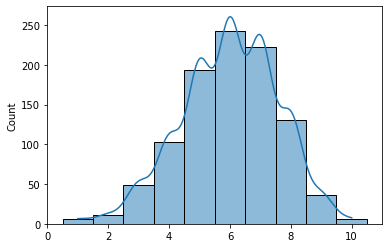

In [10]:
# This is a get reward function for a bandit with max $ reward value
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if np.random.rand(1) < prob:
            reward += 1
    return reward

arm_sample = [get_reward(0.6) for _ in range(1000)]
sb.histplot(arm_sample,kde=True,discrete=True)
plt.show()

# Update the mean of record with each new action
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] +1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

# Softmax function
def softmax(values, T=1.12):
    return np.exp(values/T) / np.sum(np.exp(values/T))



### N-armed bandit with epsilon-greedy

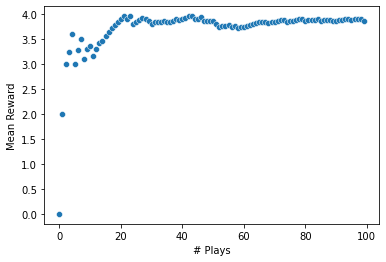

In [11]:
num_hand = 10
max_dollar_reward = 5
record = np.zeros((num_hand, 2))
prob_list = np.random.rand(num_hand)
eps = 0.3
reward = [0]
num_play = 100

for i in range(num_play-1):
    if np.random.rand(1) > eps:
        action = np.argmax(record[:,1],axis=0)
    else:
        action = np.random.randint(num_hand)
    
    R = get_reward(prob_list[action], n=max_dollar_reward)
    record = update_record(record, action, R)
    mean_reward = ((i+1) * reward[-1] + R)/(i+2)
    reward.append(mean_reward)


sb.scatterplot(x=np.arange(num_play), y=reward)
plt.xlabel("# Plays")
plt.ylabel("Mean Reward")
plt.show()

### N-armed bandit with softmax probabilistic action selection


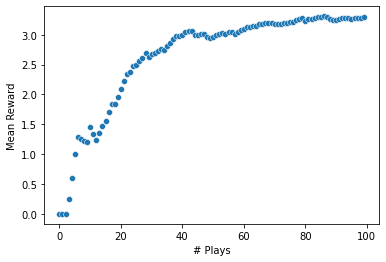

In [12]:
num_hand = 10
max_dollar_reward = 5
record = np.zeros((num_hand, 2))
prob_list = np.random.rand(num_hand)
eps = 0.3
reward = [0]
num_play = 100


for i in range(num_play-1):
    prbs = softmax(record[:, 1])
    action = np.random.choice(np.arange(num_hand), p=prbs)
    R = get_reward(prob_list[action], n=max_dollar_reward)
    record = update_record(record, action, R)
    mean_reward = ((i+1) * reward[-1] + R)/(i+2)
    reward.append(mean_reward)


sb.scatterplot(x=np.arange(num_play), y=reward)
plt.xlabel("# Plays")
plt.ylabel("Mean Reward")
plt.show()